In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wrf import getvar, vinterp, ALL_TIMES, to_np, disable_xarray

ncg1 = Dataset('D:/exp2_201303_sodar/gfs_pbl1_d3_20130301.nc')
ncg2 = Dataset('D:/exp2_201303_sodar/gfs_pbl2_d3_20130301.nc')
ncn1 = Dataset('D:/exp2_201303_sodar/nam_pbl1_d3_20130301.nc')
ncn2 = Dataset('D:/exp2_201303_sodar/nam_pbl2_d3_20130301.nc')
wrftime = getvar(ncg1, "times", timeidx=ALL_TIMES)
utc2loc = np.timedelta64(6,'h')
wrftimes = pd.to_datetime(wrftime.values)-utc2loc

In [2]:
g1 = pd.read_pickle('exp2_gfs_pbl1_d3.pk')
g2 = pd.read_pickle('exp2_gfs_pbl2_d3.pk')
g1p = g1.interpolate(limit=99)
g2p = g2.interpolate(limit=99)

In [3]:
sod_sp = pd.read_pickle('sodar_sp.pk')
sod_dd = pd.read_pickle('sodar_dd.pk')
sod_tv = pd.read_pickle('sodar_tv.pk')


In [4]:
#np.empty((0, 100))
wind, direc, zlev = [], [], []
for i in range(331):
    uv, wdir = getvar(ncn2, "uvmet_wspd_wdir", timeidx=i, meta=False)
    z = getvar(ncn2, "z", timeidx=i, meta=False)
    #lev = uv[:,25,25].argmax()
    w = uv[:,25,25]
    d = wdir[:,25,25]
    z = z[:,25,25]
    wind = np.append(wind, w)
    direc = np.append(direc, d)
    zlev = np.append(zlev, z)
    #result_array = np.append(result_array, result)
    #print(i, lev, wind, zlev)

In [5]:
zz = zlev.reshape(331,31)
ww = wind.reshape(331,31)
dd = direc.reshape(331,31)

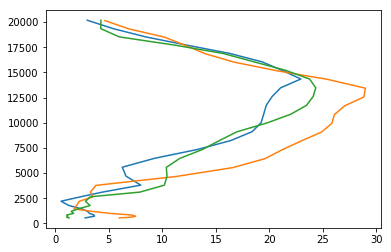

In [6]:
time1, time2 = 0, 48
plt.plot(ww[time1,:], zz[time1,:])
plt.plot(ww[time2,:], zz[time2,:])
plt.plot(ww[12,:], zz[12,:])

[]

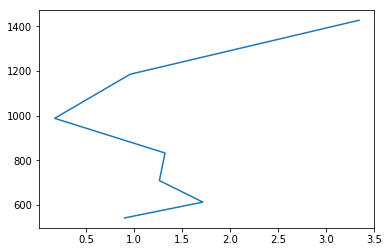

In [7]:
i = 24
lim = 7
uv, wdir = getvar(ncn2, "uvmet_wspd_wdir", timeidx=i, meta=False) #[:,25,25]
wind, wdr = uv[:lim,25,25], wdir[:lim,25,25]
z = getvar(ncn2, "z", timeidx=i, meta=False)[:lim,25,25]
#cape2d = getvar(ncn2, "cape_2d", timeidx=i, meta=False)    # mcape/mcin/lcl/lfc
#cape3d = getvar(ncn2, "cape_3d", timeidx=i, meta=False)    # 3D cape and cin
tv = getvar(ncn2, "tv", timeidx=i, meta=False)[:lim,25,25]
#plt.plot(tv-273, z)
plt.plot(wind, z)
plt.plot()

spd_30     3.18
spd_40     2.06
spd_50     2.98
spd_60     2.90
spd_70     3.08
spd_80     3.25
spd_90     3.43
spd_100    3.52
spd_110    3.65
spd_120    3.69
spd_130    3.74
spd_140    3.78
spd_150    4.03
spd_160    4.26
spd_170    4.43
spd_180    4.58
spd_190    4.57
spd_200    4.79
spd_210    4.98
spd_220    5.21
spd_230    5.24
spd_240    5.19
spd_250    5.03
spd_260    4.88
Name: 2012-08-17 06:30:00, dtype: float64

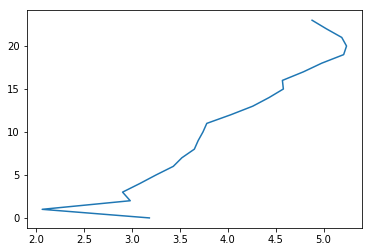

In [8]:
i, last = 60, 24
plt.plot(sod_sp.iloc[i,:last], np.arange(last))
sod_sp.iloc[i,:last]

56


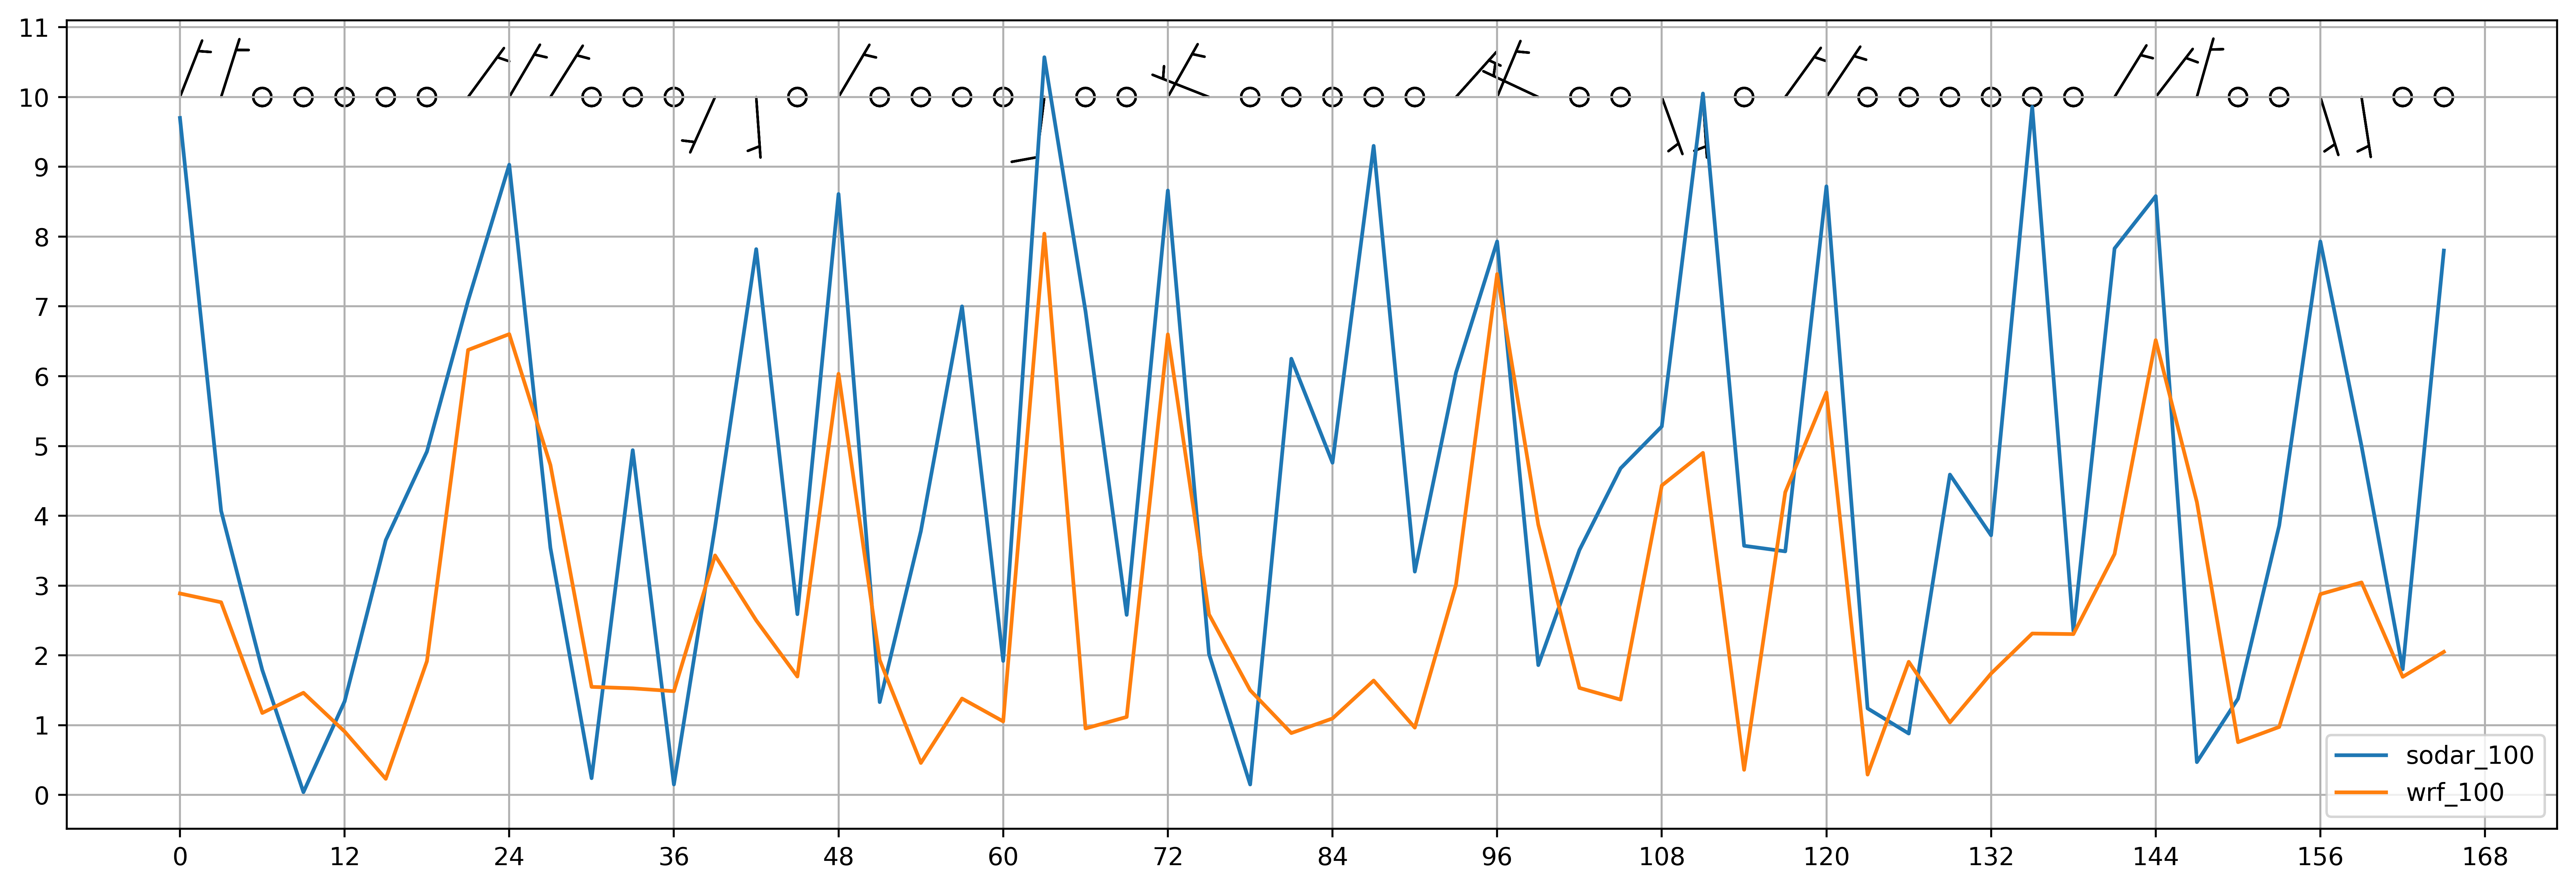

In [32]:
fig = plt.figure(figsize=[18,6], dpi=500)
#plt.plot(g1['w100'])
skip = 6
sw = g1['w100'][::skip].values
ss = g1['s100'][::skip].values

dd = np.radians(g1['wd100'][::skip])

X = np.arange(331)[::skip]/skip
Y = 10
X, Y = np.meshgrid(X, Y)
UX, VY = sw*np.sin(dd), sw*np.cos(dd)
plt.barbs(X, Y, UX, VY)
plt.grid(True)
# xticks(locs, [labels], **kwargs)
plt.xticks(np.linspace(0,56,15), np.arange(331)[::(2*skip)])   # (pos, valor)
plt.yticks(np.arange(12))
plt.plot(ss, label='sodar_100')
plt.plot(sw, label='wrf_100')
plt.legend()

print(np.arange(331)[::skip].shape[0])

56


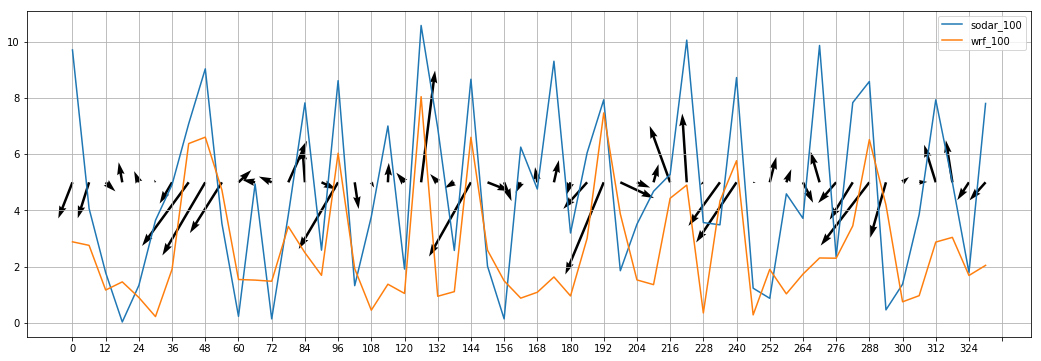

In [10]:
fig = plt.figure(figsize=[18,6])
#plt.plot(g1['w100'])
skip = 6
sw = g1['w100'][::skip].values
ss = g1['s100'][::skip].values

dd = np.radians(g1['wd100'][::skip])

X = np.arange(331)[::skip]/skip
Y = 5
X, Y = np.meshgrid(X, Y)
UX, VY = sw*np.sin(dd), sw*np.cos(dd)
plt.quiver(X, Y, UX, VY, scale_units='xy', scale=2, width=.0025)
plt.grid(True)
# xticks(locs, [labels], **kwargs)
plt.xticks(np.linspace(0,56,29), np.arange(331)[::(2*skip)])   # (pos, valor)
plt.plot(ss, label='sodar_100')
plt.plot(sw, label='wrf_100')
plt.legend()
print(np.arange(331)[::skip].shape[0])

Valid  2013-03-03 18:00:00
AGL = 74.00177001953125 Direc = 210.98022   Veloc = 6.57149


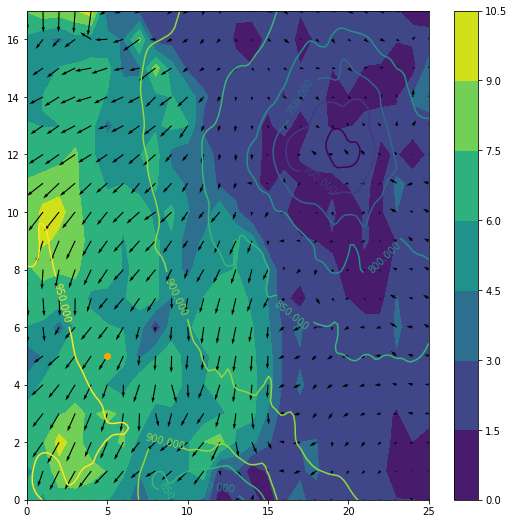

In [11]:
plt.figure(figsize=[9,9])
time = 144
lvl = 1
skip = 5

uv, wdir = getvar(ncg1, "uvmet_wspd_wdir", timeidx=time)
ua, va = getvar(ncg1, "ua", timeidx=time), getvar(ncg1, "va", timeidx=time)
agl = getvar(ncg1, "z", timeidx=time)[lvl,25,25].values-540
X = np.arange(129/skip)
Y = np.arange(90/skip)
X, Y = np.meshgrid(X, Y)
UW, VW = ua[lvl,::skip,::skip].T, va[lvl,::skip,::skip].T
arroww = plt.quiver(X, Y, -UW, -VW) #, scale=.10  color='red', scale_units='xy', scale=2, , width=.0025
winds = np.sqrt(np.power(UW, 2) + np.power(VW,2))
arroww = plt.contourf(X, Y, winds, zorder=0)
plt.colorbar(arroww)
P = getvar(ncg1, "pressure", timeidx=time)[lvl,:,:].T
X, Y = np.linspace(0, 17, 90), np.linspace(0, 25, 129)
#print(P.shape, X.shape, Y.shape)
CS = plt.contour(Y, X, P)
plt.clabel(CS, inline=1, fontsize=10)
plt.scatter(5,5, color='orange')
print('Valid ' , wrftimes[time])
print('AGL =', '% 6.2f' %agl, 'Direc =', '% 6.2f' %wdir[lvl,25,25].values, '  Veloc =', '% 6.2f' %winds[5,5].values)
print('AGL =', '% 6.2f' %agl, 'Direc =', '% 6.2f' %wdir[lvl,25,25].values, '  Veloc =', '% 6.2f' %winds[5,5].values)

Valid  2013-03-01 18:00:00  171.32
 210.18


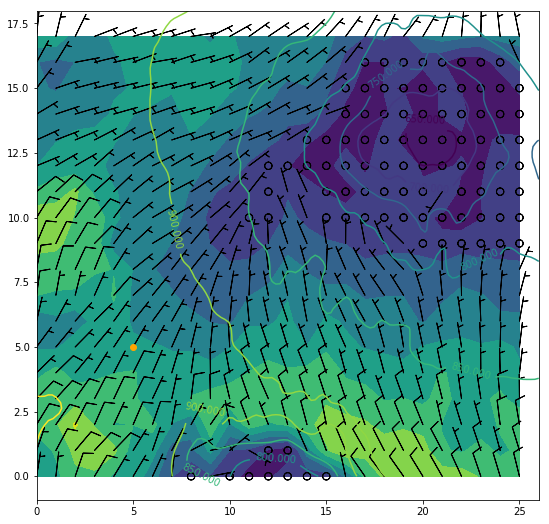

In [15]:
plt.figure(figsize=[9,9])
time = 48
lvl = 2
skip = 5

uv, wdir = getvar(ncg1, "uvmet_wspd_wdir", timeidx=time)
ua, va = getvar(ncg1, "ua", timeidx=time), getvar(ncg1, "va", timeidx=time)
agl = getvar(ncg1, "z", timeidx=time)[lvl,25,25].values-540
X = np.arange(129/skip)
Y = np.arange(90/skip)
Xm, Ym = np.meshgrid(X, Y)
UW, VW = ua[lvl,::skip,::skip].T, va[lvl,::skip,::skip].T
arroww = plt.barbs(Xm, Ym, -UW, -VW) #, scale=.10  color='red', scale_units='xy', scale=2, , width=.0025
winds = np.sqrt(np.power(UW, 2) + np.power(VW,2))
plt.contourf(X, Y, winds, zorder=0)

P = getvar(ncg1, "pressure", timeidx=time)[lvl,:,:].T
X, Y = np.linspace(0, 18, 90), np.linspace(0, 26, 129)
#print(P.shape, X.shape, Y.shape)
CS = plt.contour(Y, X, P)
plt.clabel(CS, inline=1, fontsize=10)
plt.scatter(5,5, color='orange')
print('Valid ' , wrftimes[time], '% 6.2f' %agl)
print('% 6.2f' %wdir[lvl,25,25].values)